# Training and Test Accuracy

In [1]:
FSETS=['f2f','f2fsr','sumpb','combi']
SPLITS=['instance','class']
DIR='../data/xtra-berlin'
CONFNAME="config.yaml"
_nomenclature = {'sumpb' : 'lipb', 'vbc' : 'VB', 'sbc' : 'SB', 'def' : 'Def'}
FIGOUT='img/pred-accuracy.pdf'
WIDTH_IN=4.5

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

acc = pd.read_csv(f'{DIR}/accuracy.csv.gz')
print(acc)

        split featureset  cycle  train_accuracy  test_accuracy
0       class      combi     10        0.727273       0.134454
1    instance      combi     10        0.728000       0.544000
2       class        f2f     10        0.727273       0.151261
3    instance        f2f     10        0.746000       0.544000
4       class      f2fsr     10        0.770751       0.184874
..        ...        ...    ...             ...            ...
395  instance        f2f      9        0.716000       0.520000
396     class      f2fsr      9        0.777056       0.294479
397  instance      f2fsr      9        0.648000       0.576000
398     class      sumpb      9        0.675325       0.282209
399  instance      sumpb      9        0.690000       0.528000

[400 rows x 5 columns]


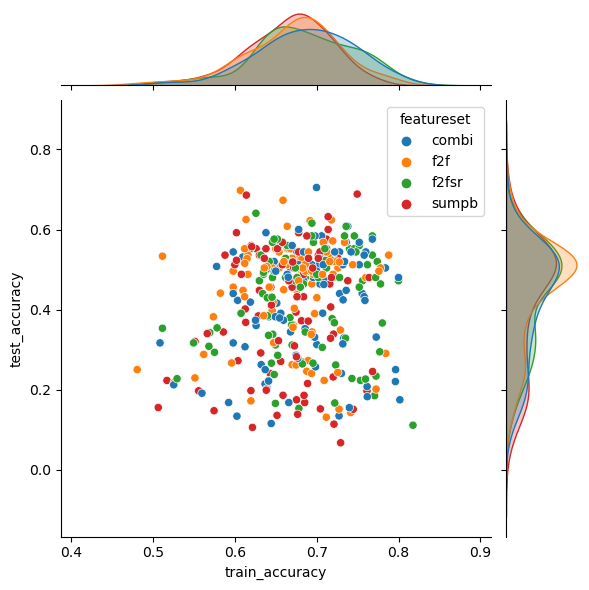

In [2]:
sns.jointplot(data=acc,x='train_accuracy', y='test_accuracy', hue='featureset')

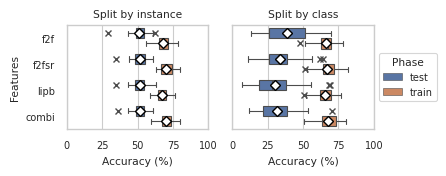

In [5]:
acc_long = acc.melt(id_vars=['featureset','split'],value_vars=['train_accuracy', 'test_accuracy'],
                   var_name='Phase', value_name='accuracy')
acc_long['Phase'] = acc_long.Phase.str.replace('_accuracy','').astype('category')
acc_long['featureset'] = acc_long.featureset.str.replace('sumpb', 'lipb').astype('category')
acc_long['split'] = acc_long.split.astype('category')
acc_long['accuracy'] = 100*acc_long.accuracy # as a percentage
sns.set(
        context="paper", style="ticks", font_scale=0.8,
        rc={"font.family": "sans-serif", "lines.linewidth"  : 0.8,}
)
_meanprops = {"marker":"D",
              "markerfacecolor":"white",
              "markeredgecolor":"black",
              "markersize":5,
            "linewidth":1}
_flierprops = {'marker':'x'}

with sns.axes_style("whitegrid"):
    fig,axs=plt.subplots(1,2,figsize=(WIDTH_IN,0.4*WIDTH_IN),sharex=True,sharey=True)
    for col, split in enumerate(['instance', 'class']):
        ax=axs[col]
        df=acc_long.loc[acc_long.split==split]
        sns.boxplot(ax=ax, data=df, x='accuracy', y='featureset', hue='Phase',
                    showmeans=True, meanprops=_meanprops, flierprops=_flierprops,
                    order=['f2f', 'f2fsr', 'lipb', 'combi'],
                   )
        ax.set(xlabel="Accuracy (%)", ylabel="Features" if col==0 else None,
               title=f"Split by {split}", xlim=(0,100))
        if col==0:
            ax.get_legend().remove()
        else:
            ax.legend(title="Phase", loc="center left", bbox_to_anchor=(1,0.5))
    fig.tight_layout()
    fig.savefig(FIGOUT,dpi=1200)
